In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
# Genera redditi simulati (esponenziale = distribuzione reale approssimativa)
np.random.seed(42)
# Simula 1000 redditi da una distribuzione di Pareto
redditi_pareto = (np.random.pareto(a=1.5, size=1000) + 1) * 10000
redditi_pareto = np.clip(redditi_pareto, 5000, 200000).round()

df = pd.DataFrame({'Reddito': redditi_pareto})


C:\Users\Antonio\AppData\Local\Temp\ipykernel_36336\4214906809.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


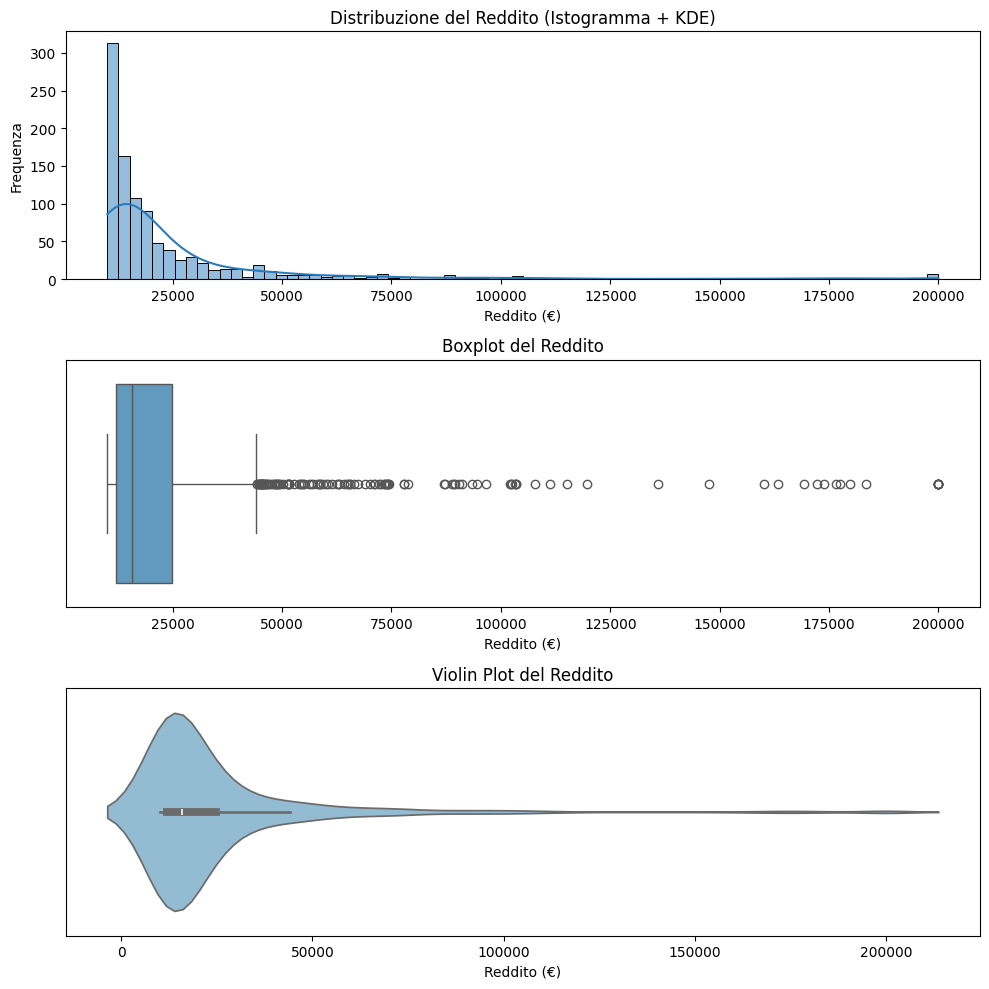

In [4]:
# Crea un layout con 3 grafici allineati verticalmente
sns.set_style()
palette = sns.color_palette("Blues")
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
gs = GridSpec(3, 1, figure=fig)

# Istogramma con KDE
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df["Reddito"], kde=True, color=palette[4], ax=ax1)
ax1.set_title("Distribuzione del Reddito (Istogramma + KDE)")
ax1.set_xlabel("Reddito (€)")
ax1.set_ylabel("Frequenza")

# Boxplot
ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(x=df["Reddito"], color=palette[3], ax=ax2)
ax2.set_title("Boxplot del Reddito")
ax2.set_xlabel("Reddito (€)")
ax2.set_yticks([])  # rimuove ticks verticali

# Violin plot
ax3 = fig.add_subplot(gs[2, 0])
sns.violinplot(x=df["Reddito"], color=palette[2], ax=ax3)
ax3.set_title("Violin Plot del Reddito")
ax3.set_xlabel("Reddito (€)")
ax3.set_yticks([])  # rimuove ticks verticali

plt.tight_layout()
plt.show()

In [5]:

# Calcolo di media, mediana e moda per il reddito
mean_income = df["Reddito"].mean().round()
median_income = df["Reddito"].median().round()
mode_income = df["Reddito"].mode().round().iloc[0]# Prende il primo valore modale, se ce ne sono più

mean_income, median_income, mode_income

(24872.0, 15807.0, 200000.0)

In [13]:
from scipy.stats import mode
mode_income = df["Reddito"]
mode = mode(np.array(mode_income))
mode 




ModeResult(mode=200000.0, count=7)

In [6]:
custom_rc = {
    "axes.facecolor": "#f7f9fc",       # light gray-blue background
    "figure.facecolor": "#ffffff",     # white figure background
    "axes.edgecolor": "#cccccc",       # soft borders
    "axes.labelcolor": "#333333",      # dark gray text
    "xtick.color": "#666666",
    "ytick.color": "#666666",
    "grid.color": "#d0d7de",           # light blue-gray grid
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.family": "sans-serif",
    "font.size": 12,
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "legend.frameon": False
}

# 2. Set the Seaborn style and custom rcParams
sns.set_theme(style="whitegrid", rc=custom_rc)
cold_palette = ["#567cce", "#0F243F", "#C8D6E5"]
sns.set_palette(cold_palette)  # optional global set

# Example KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(x=n1, color=cold_palette[0], label='Varianza 1 (σ²=1)', linewidth=2, alpha=0.8)
sns.kdeplot(x=n2, color=cold_palette[1], label='Varianza 2 (σ²=4)', linewidth=2, alpha=0.8)

plt.title('Confronto tra due distribuzioni con varianze diverse', fontsize=14)
plt.xlabel('Valore')
plt.ylabel('Densità stimata')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

NameError: name 'n1' is not defined

<Figure size 1000x500 with 0 Axes>

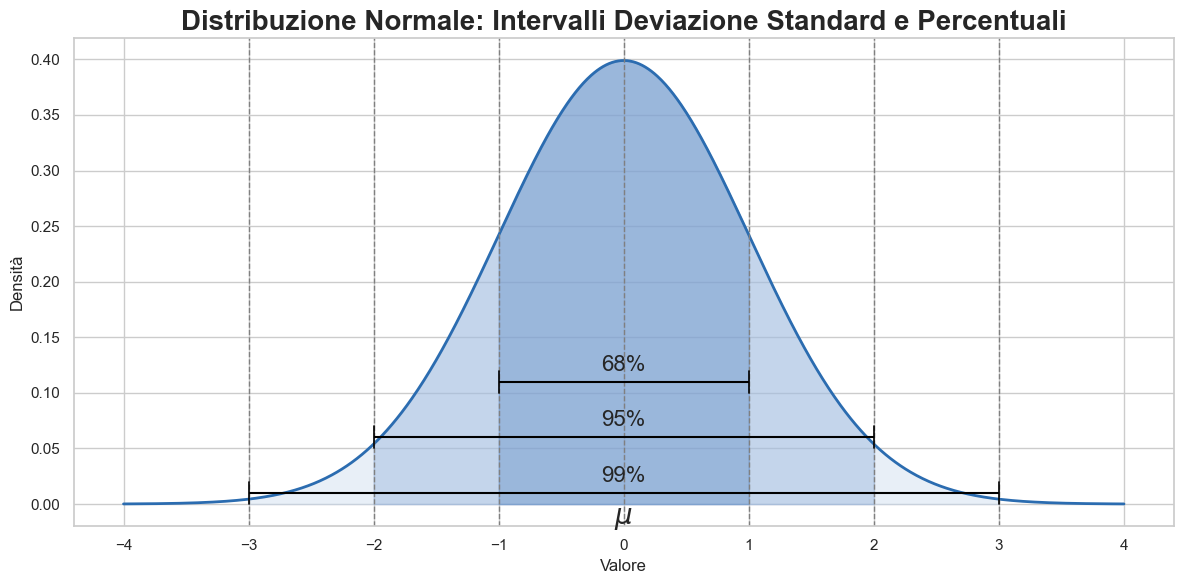

In [ ]:
# Recreate the plot with percentage labels for each sigma region
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Normal distribution
x = np.linspace(-4, 4, 1000)
mu = 0
sigma = 1
y = (1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * x**2)
plt.plot(x, y, color="#2b6cb0", linewidth=2)

# Shaded areas: 3σ, 2σ, 1σ in reverse order
regions = [
    (3, 0.997, "#c6d7ec"),
    (2, 0.95, "#8faed9"),
    (1, 0.68, "#5c8ac4")
]

# Plot shaded areas
for sigma_range, pct, color in regions:
    x_fill = np.linspace(mu - sigma_range, mu + sigma_range, 1000)
    y_fill = (1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5 * x_fill**2)
    plt.fill_between(x_fill, y_fill, alpha=0.4, color=color)

# Vertical dashed lines
for s in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(s, color='gray', linestyle='--', linewidth=1)

# Horizontal "arch" lines with percent annotations
y_start = 0.01
for idx, (s, pct, _) in enumerate(regions):
    y_line = y_start + idx * 0.05
    plt.hlines(y=y_line, xmin=-s, xmax=s, color="black", linewidth=1.5)
    plt.plot([-s, -s], [y_line - 0.01, y_line + 0.01], color="black", linewidth=1.2)
    plt.plot([s, s], [y_line - 0.01, y_line + 0.01], color="black", linewidth=1.2)
    # Add centered text with percentage
    plt.text(0, y_line + 0.01, f"{int(pct*100)}%", fontsize=16, ha='center')

# μ annotation
plt.text(0, -0.025, r"$\mu$", fontsize=20, ha='center', va='bottom')

# Final layout
plt.title("Distribuzione Normale: Intervalli Deviazione Standard e Percentuali", fontsize=20, weight='bold')
plt.xlabel("Valore")
plt.ylabel("Densità")
plt.tight_layout()
plt.show()
